## Comparison between LDA and FastText to identify similar documents from training set 

In [1]:
from Model import Model
from Validation import Validation
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
from gensim.models.fasttext import FastText as FT_gensim
from gensim.test.utils import datapath
import gensim

## Load data

In [2]:
data_df=Model().df_pkl
train,test,train_df,test_df=Model().get_train_and_test_for_FT(data_df.copy())

In [3]:
train_dict={tup[0]:tup[1] for tup in list(zip(train_df['Name'],train_df['EC']))}
test_dict={tup[0]:tup[1] for tup in list(zip(test_df['Name'],test_df['EC']))}

In [4]:
data_df_cols=data_df[['Map','Name','EC_all_cleaned']]
data_df_cols.rename(columns={'EC_all_cleaned':'EC'}, inplace=True)
data_dict={tup[0]:tup[1] for tup in list(zip(data_df_cols['Name'],data_df_cols['EC']))}
data=Model().get_EC_list(data_df_cols)

## Run LDA analysis

In [5]:
dictionary,corpus=Model().get_dict_corpus(data)
model= gensim.models.LdaModel.load('lda_train_120topics_100passes_alldata_04262020.model')

Mean distance is 0.8642589936944871 and standard deviation is 0.24915193633877492


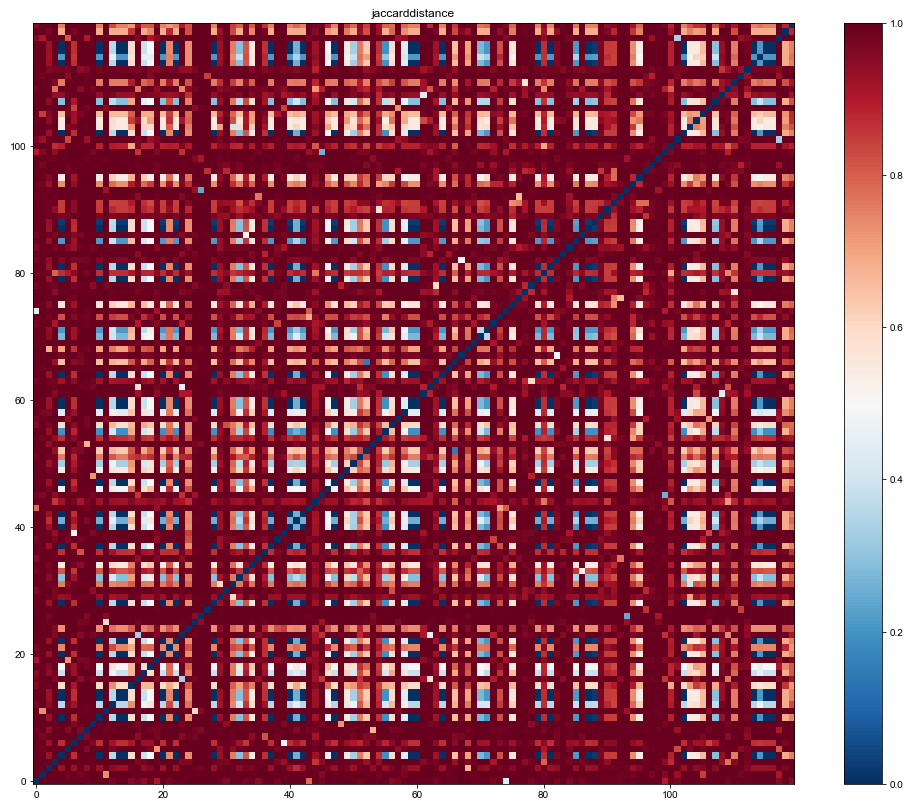

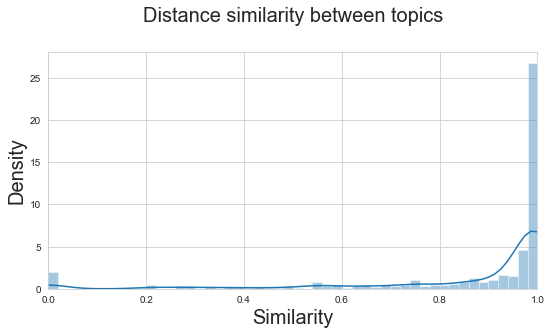

In [6]:
distance_list=Validation().get_topic_similarity(topics=120,model=model,distance='jaccard')
print ("Mean distance is {} and standard deviation is {}".format(np.mean(distance_list),np.std(distance_list)))


Mean distance is 0.5863882342719979 and standard deviation is 0.2896325989262499


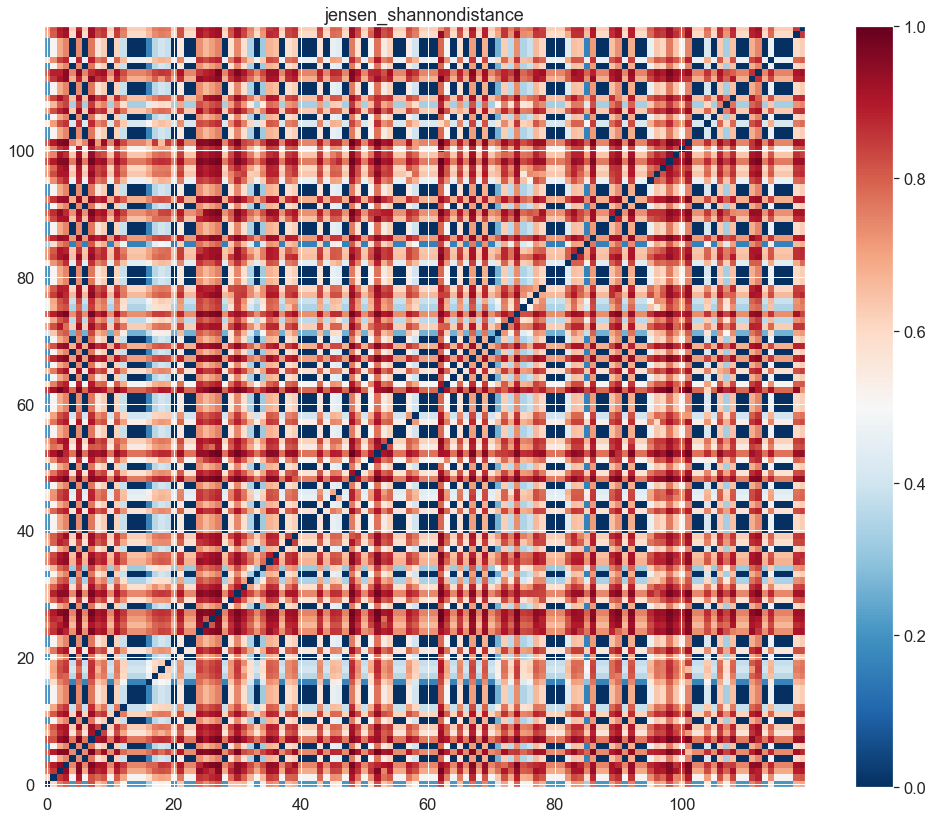

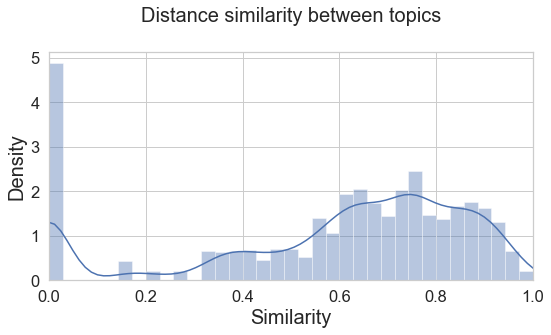

In [7]:
distance_list=Validation().get_topic_similarity(topics=120,model=model,distance='jensen_shannon')
print ("Mean distance is {} and standard deviation is {}".format(np.mean(distance_list),np.std(distance_list)))


### Similarity value close to 0 suggests more similar documents and 1 is least similar

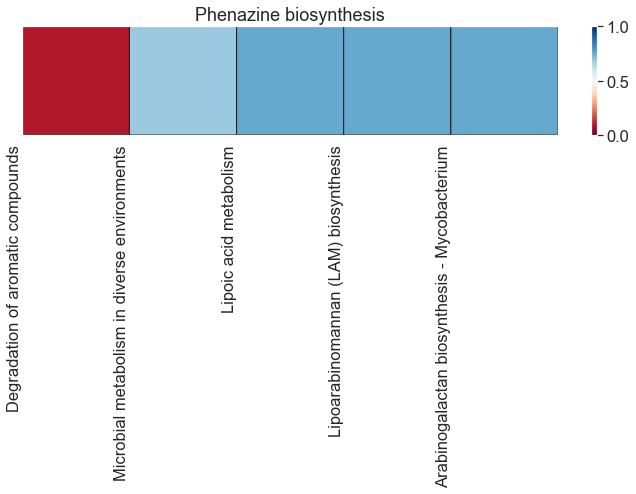

<Figure size 432x288 with 0 Axes>

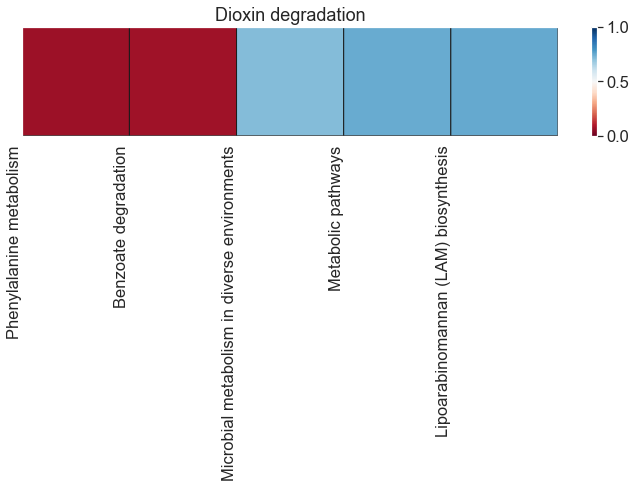

<Figure size 432x288 with 0 Axes>

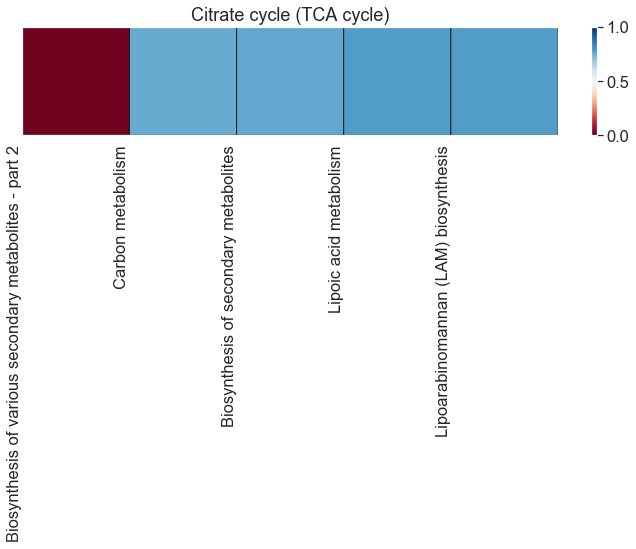

<Figure size 432x288 with 0 Axes>

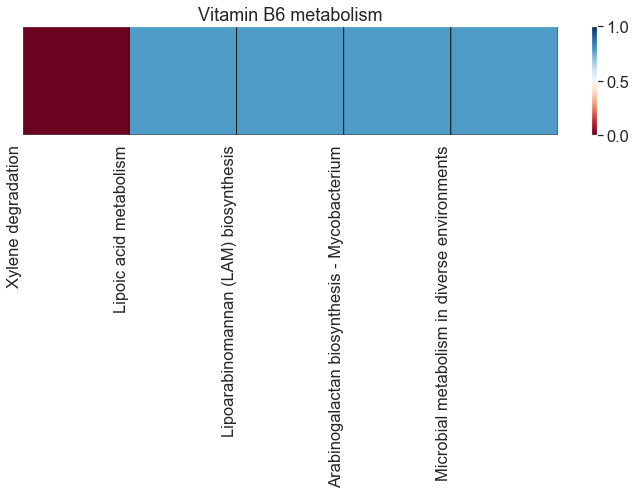

<Figure size 432x288 with 0 Axes>

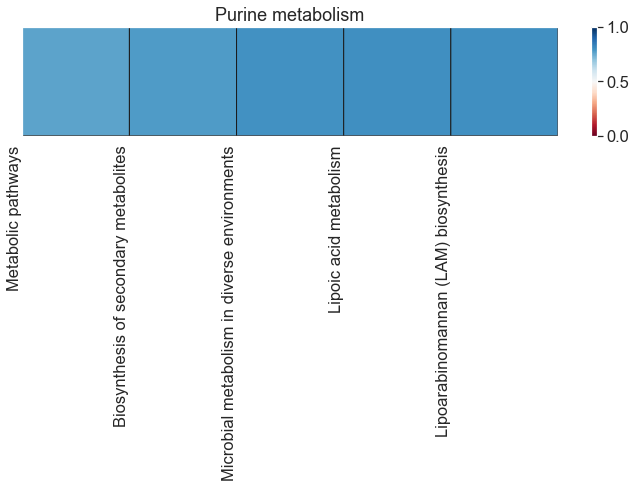

<Figure size 432x288 with 0 Axes>

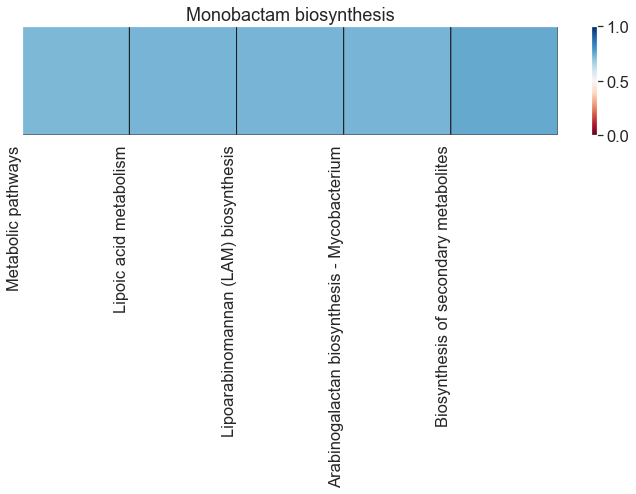

<Figure size 432x288 with 0 Axes>

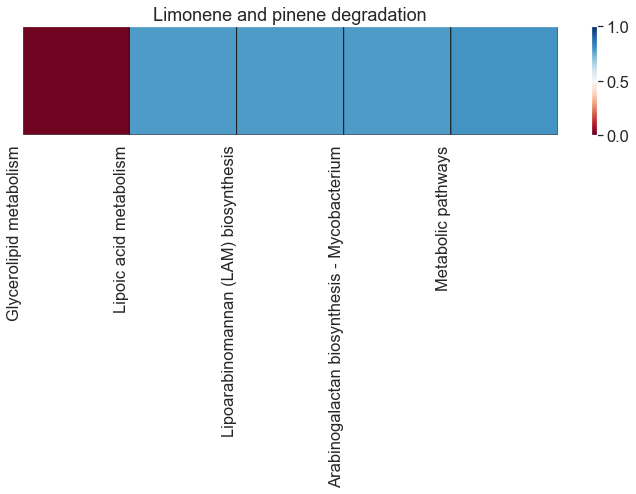

<Figure size 432x288 with 0 Axes>

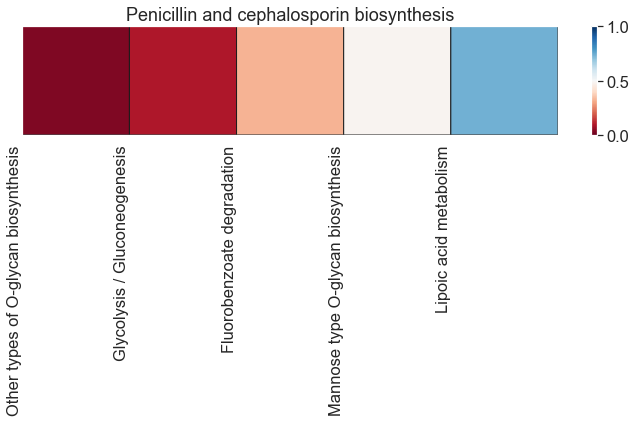

<Figure size 432x288 with 0 Axes>

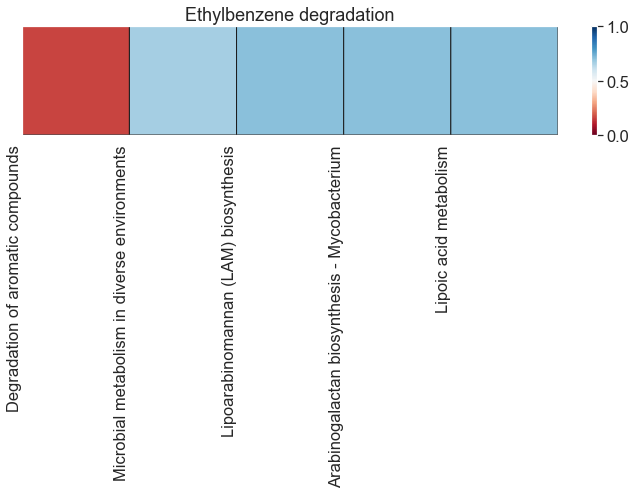

<Figure size 432x288 with 0 Axes>

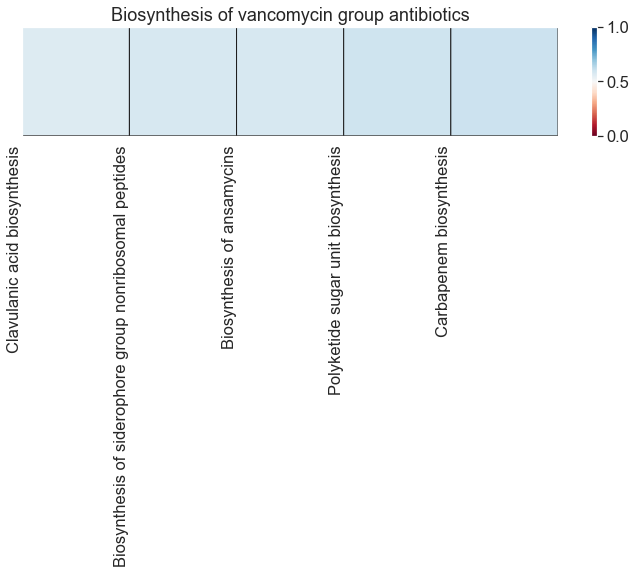

<Figure size 432x288 with 0 Axes>

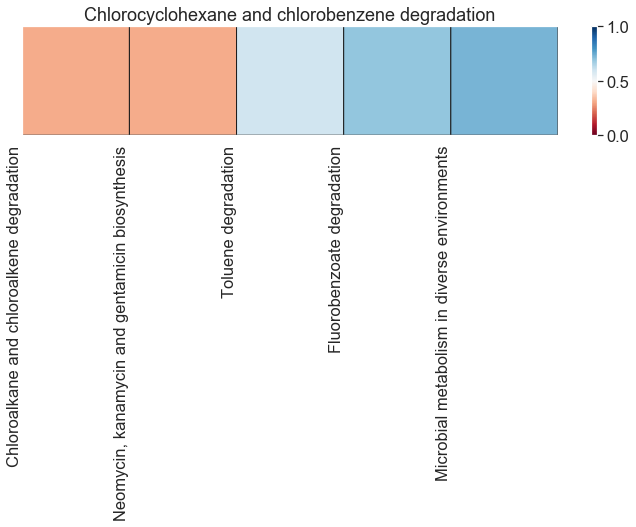

<Figure size 432x288 with 0 Axes>

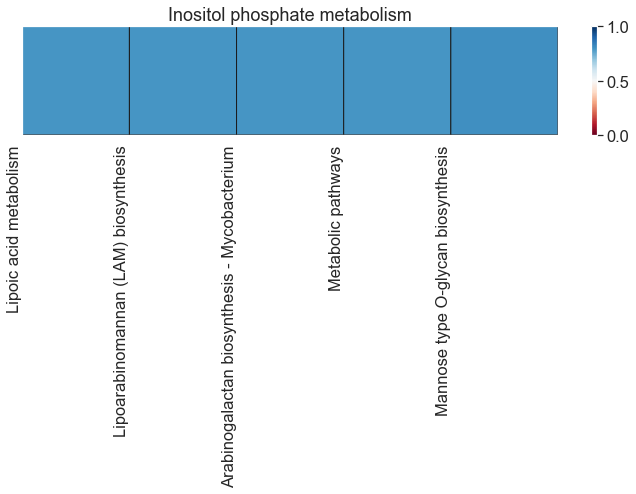

<Figure size 432x288 with 0 Axes>

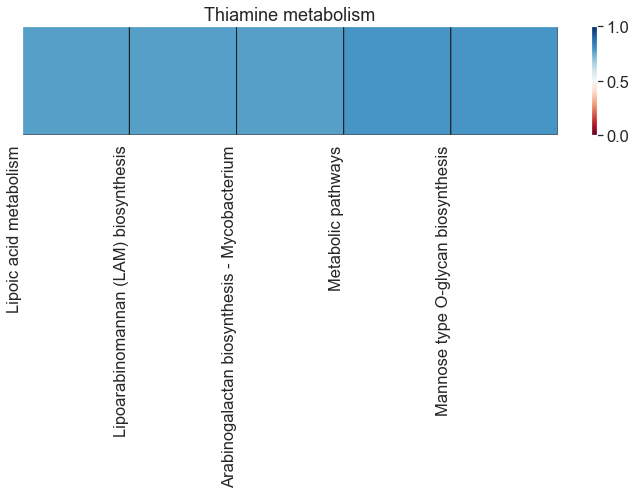

<Figure size 432x288 with 0 Axes>

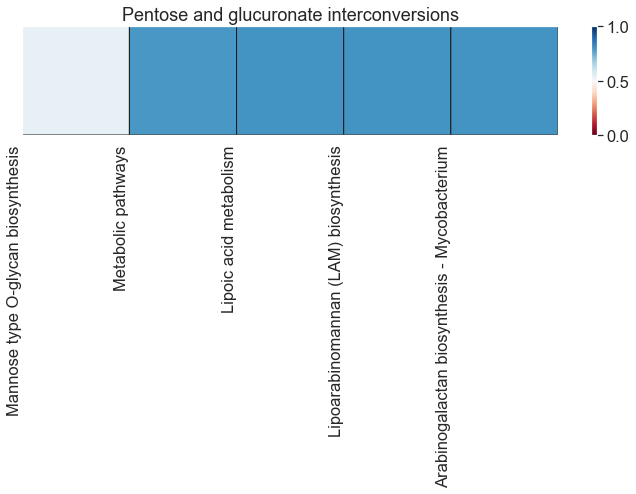

<Figure size 432x288 with 0 Axes>

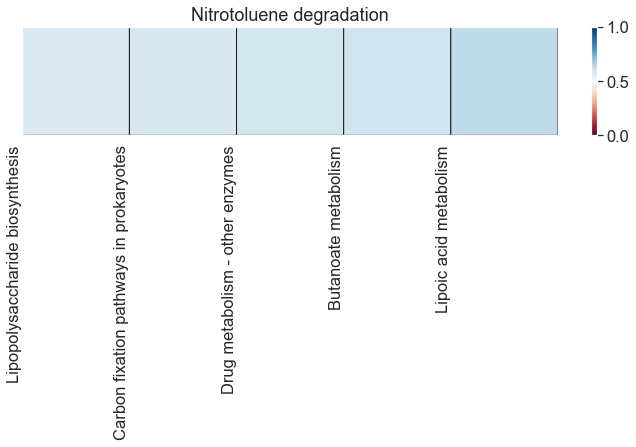

<Figure size 432x288 with 0 Axes>

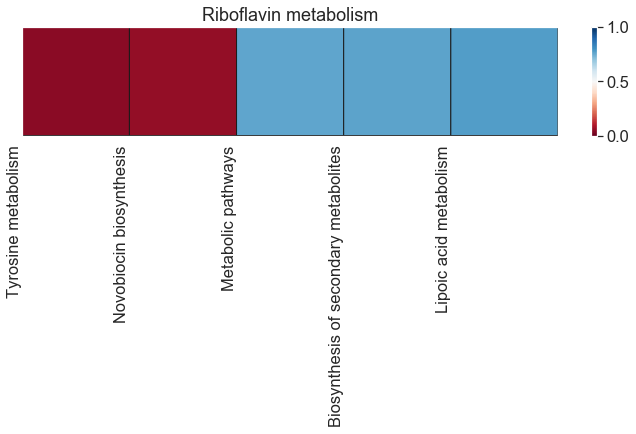

<Figure size 432x288 with 0 Axes>

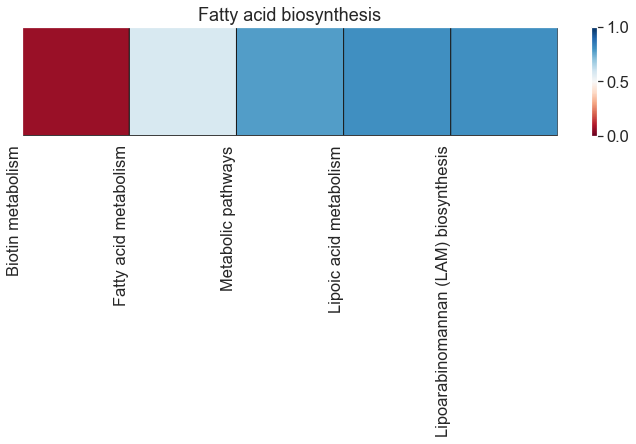

<Figure size 432x288 with 0 Axes>

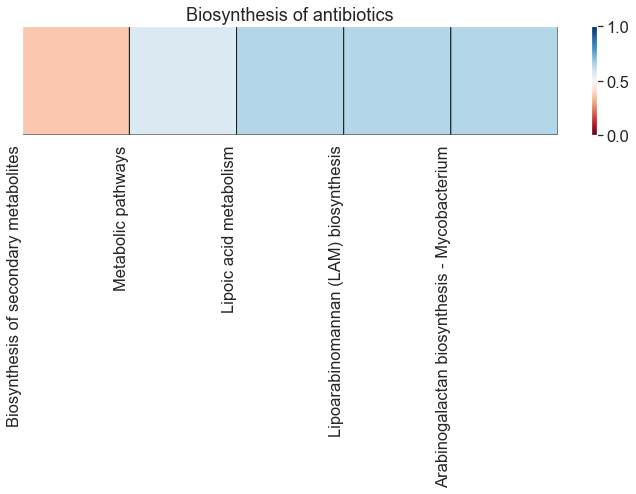

<Figure size 432x288 with 0 Axes>

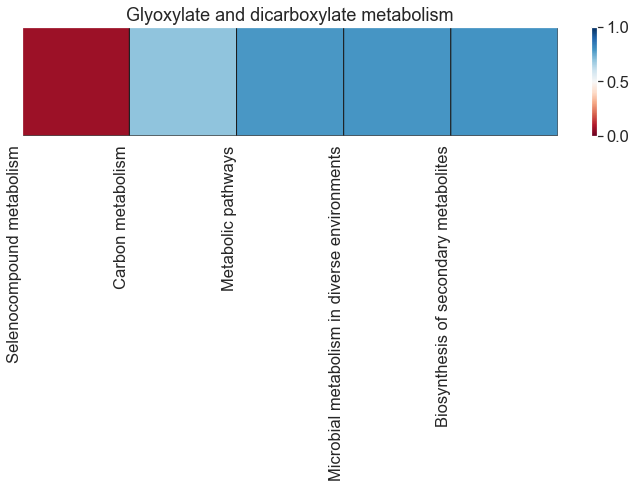

<Figure size 432x288 with 0 Axes>

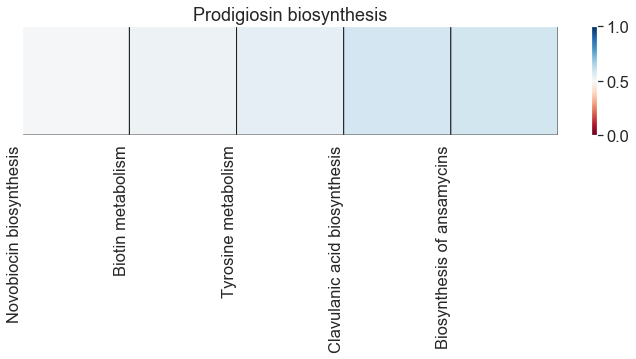

<Figure size 432x288 with 0 Axes>

In [8]:
df_result=Validation().compare_test_train_docs(test_df,train_df,model,dictionary)
Validation().print_heat_map_for_one(df_result,test_df)

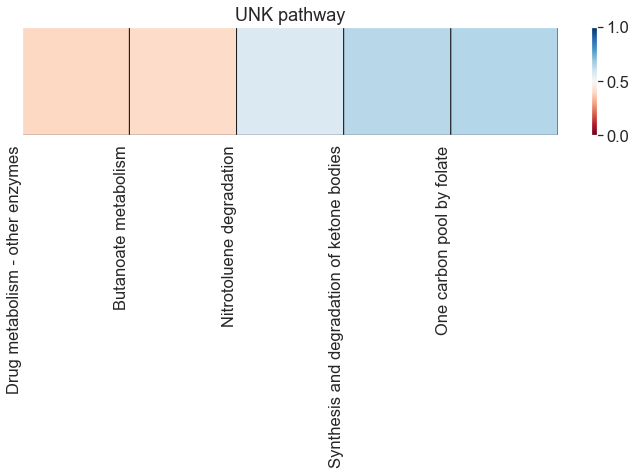

<Figure size 432x288 with 0 Axes>

In [9]:
valid=['ec:4.2.1.166','ec:2.8.3.8','ec:3.1.2.1','ec:4.2.1.55','ec:1.1.1.157','ec:2.3.1.9'];valid_dist={}
valid_dist['Map']='PF06050'
valid_dist['Name']='UNK pathway'
valid_dist['EC']=[valid]
df_validate=pd.DataFrame(valid_dist)
df_validate
df_result=Validation().compare_test_train_docs(df_validate,data_df_cols,model,dictionary)
Validation().print_heat_map_for_one(df_result,df_validate)

## Run FastText similarity based classification to identify similar documents from training set. 
### Parameters for model are based on (a) length of words, (b) size of document and hence window

In [10]:
name = "fasttext_04252020.model"
model_gensim = FT_gensim.load(name)


In [11]:
model_gensim.most_similar("ec:1.1.1.6",topn=10)

/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ec:1.1.1.61', 0.9933221340179443),
 ('ec:1.1.1.64', 0.9931098818778992),
 ('ec:1.1.1.60', 0.9927927851676941),
 ('ec:1.1.1.67', 0.9914795160293579),
 ('ec:1.1.1.62', 0.9906091094017029),
 ('ec:1.1.1.65', 0.9871209263801575),
 ('ec:1.1.1.84', 0.9800038933753967),
 ('ec:1.1.1.75', 0.9761358499526978),
 ('ec:1.1.1.78', 0.9728559255599976),
 ('ec:1.1.1.87', 0.9709004163742065)]

In [12]:
model_gensim.most_similar("ec:1.14.14.38",topn=100)


/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ec:1.14.14.34', 0.9967047572135925),
 ('ec:1.14.14.39', 0.9960748553276062),
 ('ec:1.14.14.36', 0.9945813417434692),
 ('ec:1.14.14.35', 0.9938251972198486),
 ('ec:1.14.14.37', 0.9936413168907166),
 ('ec:1.14.14.31', 0.9932994842529297),
 ('ec:1.14.14.42', 0.9932151436805725),
 ('ec:1.14.14.32', 0.9917359352111816),
 ('ec:1.14.14.50', 0.9910407066345215),
 ('ec:1.14.14.86', 0.9909188151359558),
 ('ec:1.14.14.88', 0.9909175634384155),
 ('ec:1.14.14.77', 0.9908918738365173),
 ('ec:1.14.14.81', 0.9908521771430969),
 ('ec:1.14.14.76', 0.99082350730896),
 ('ec:1.14.14.60', 0.9907358288764954),
 ('ec:1.14.14.82', 0.9907084107398987),
 ('ec:1.14.14.70', 0.9906905889511108),
 ('ec:1.14.14.68', 0.9906256198883057),
 ('ec:1.14.14.51', 0.9905470013618469),
 ('ec:1.14.14.80', 0.990215539932251),
 ('ec:1.14.14.43', 0.9895997047424316),
 ('ec:1.14.14.53', 0.9895926117897034),
 ('ec:1.14.14.95', 0.9895807504653931),
 ('ec:1.14.14.8', 0.9895414710044861),
 ('ec:1.14.14.67', 0.98952317237854),
 ('ec:

In [13]:
lst=[]
for i,j in enumerate(test):
    for k,l in enumerate(train):
        sim=model_gensim.n_similarity(test[i], train[k])
        if sim>0:
            lst.append([list(test_dict.keys())[i],list(train_dict.keys())[k],sim,len(test[i]),len(train[k])])
df_sim=pd.DataFrame(lst,columns=['Pathway_test','Pathway_train','Similarity','test length','train length'])


/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  after removing the cwd from sys.path.


In [14]:
#del df_sim

df_sim.sort_values(by=['Similarity'])

Pathway_test  \
71                             Phenazine biosynthesis   
180                         Citrate cycle (TCA cycle)   
841                               Thiamine metabolism   
216                         Citrate cycle (TCA cycle)   
232                             Vitamin B6 metabolism   
...                                               ...   
747   Chlorocyclohexane and chlorobenzene degradation   
1084                          Fatty acid biosynthesis   
902          Pentose and glucuronate interconversions   
200                         Citrate cycle (TCA cycle)   
313                                 Purine metabolism   

                                      Pathway_train  Similarity  test length  \
71    Sesquiterpenoid and triterpenoid biosynthesis    0.000030           13   
180                            Histidine metabolism    0.000918           30   
841   Sesquiterpenoid and triterpenoid biosynthesis    0.001135           30   
216                       One carbon pool by folate    0.001189           30   
232                          Lipoic acid metabolism    0.001570           29   
...                                             ...         ...          ...   
747                      Fluorobenzoate degradation    0.852979           25   
1084                          Fatty acid metabolism    0.908194           20   
902               Ascorbate and aldarate metabolism    0.924782           72   
200                             Pyruvate metabolism    0.925053           30   
313                           Pyrimidine metabolism    0.932880          119   

      train length  
71              82  
180             41  
841             82  
216             24  
232              5  
...            ...  
747             14  
1084            44  
902             48  
200             76  
313             68  

[1334 rows x 5 columns]

### Similarity value close to 1 suggests more similar documents and 0 is least similar

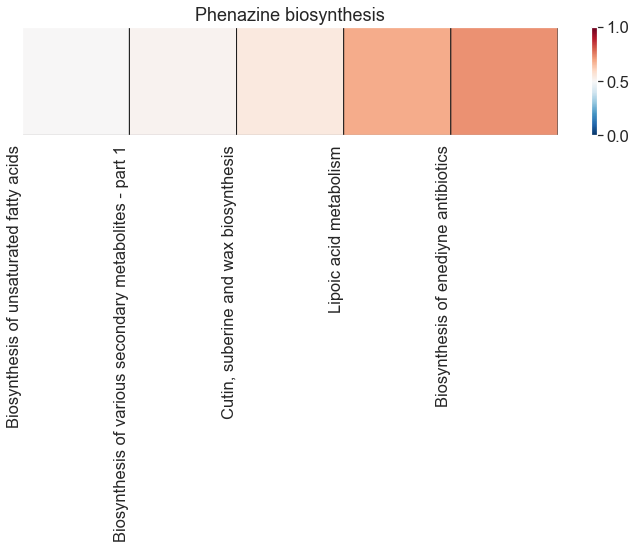

<Figure size 432x288 with 0 Axes>

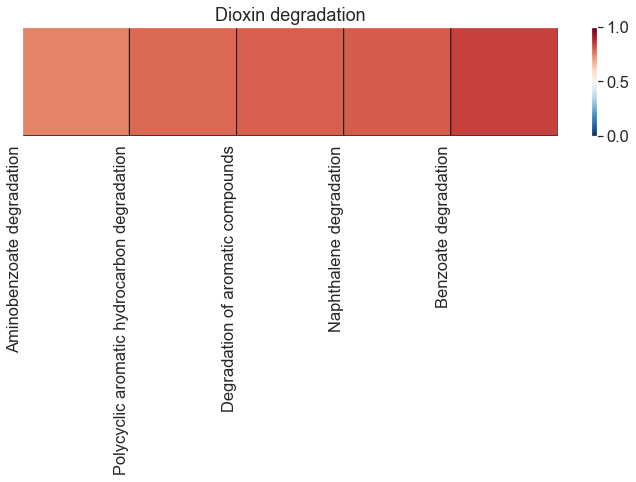

<Figure size 432x288 with 0 Axes>

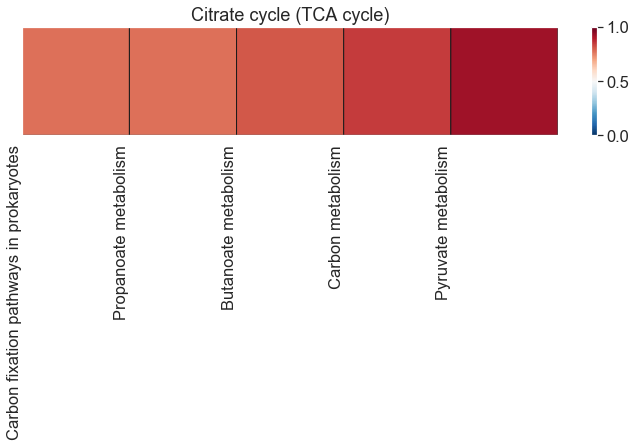

<Figure size 432x288 with 0 Axes>

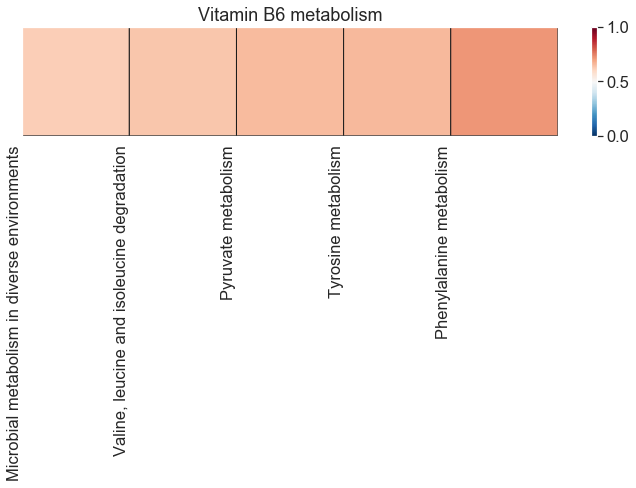

<Figure size 432x288 with 0 Axes>

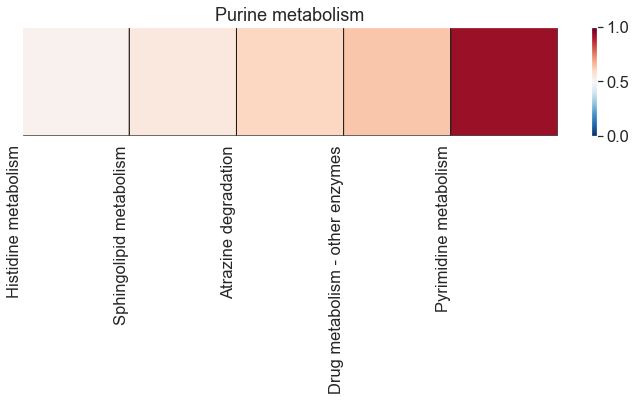

<Figure size 432x288 with 0 Axes>

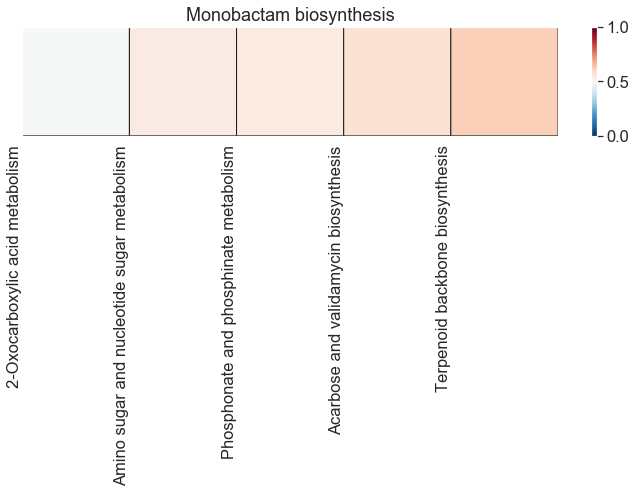

<Figure size 432x288 with 0 Axes>

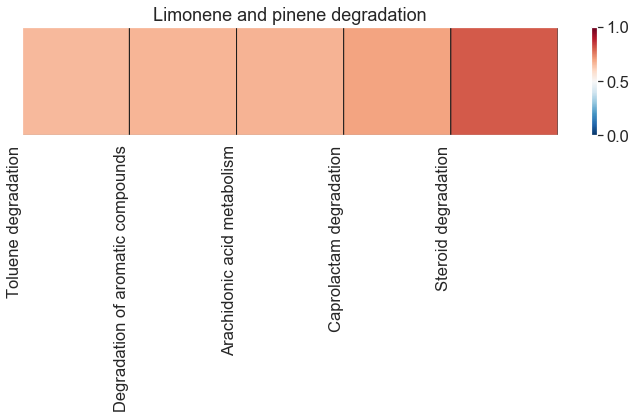

<Figure size 432x288 with 0 Axes>

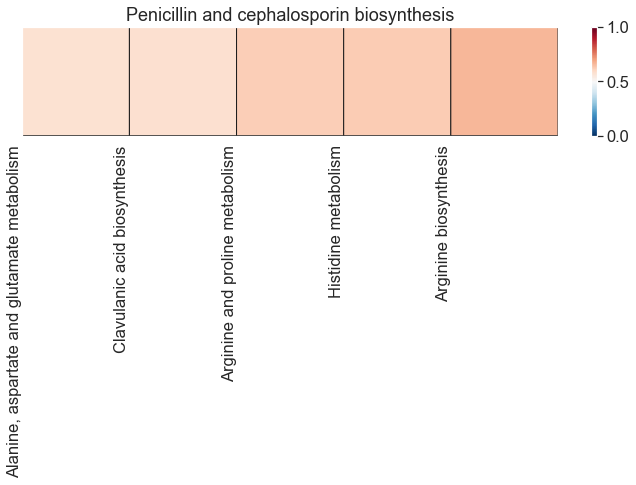

<Figure size 432x288 with 0 Axes>

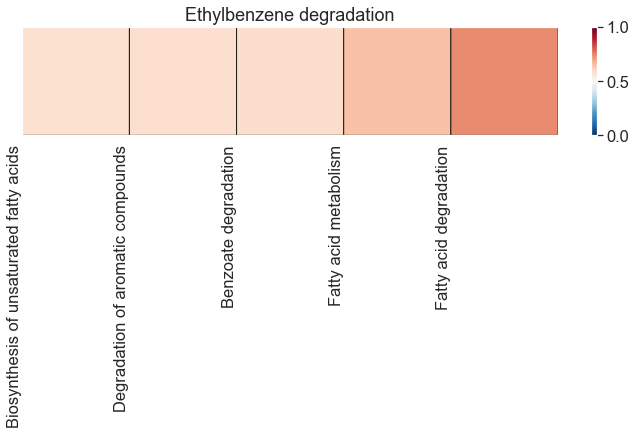

<Figure size 432x288 with 0 Axes>

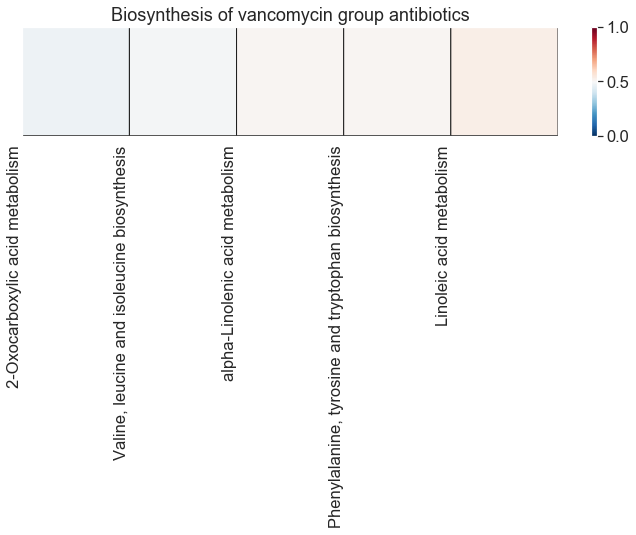

<Figure size 432x288 with 0 Axes>

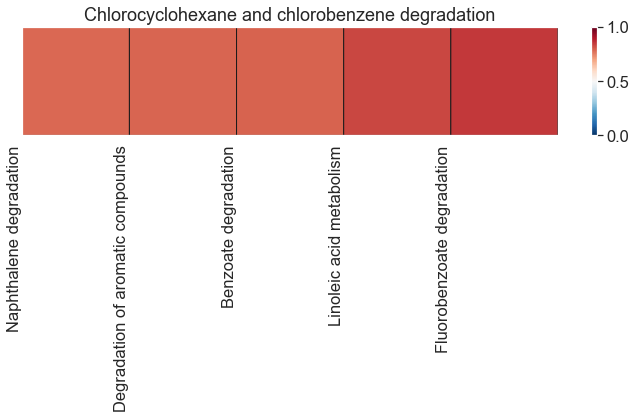

<Figure size 432x288 with 0 Axes>

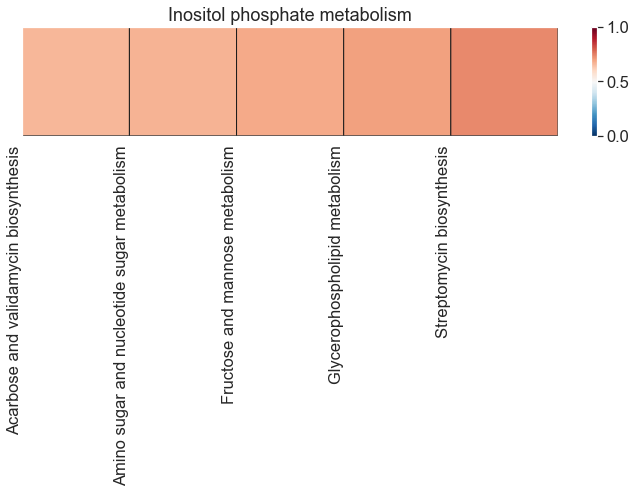

<Figure size 432x288 with 0 Axes>

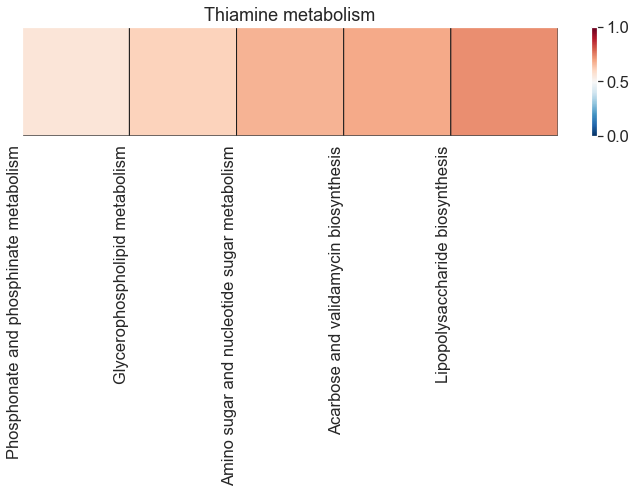

<Figure size 432x288 with 0 Axes>

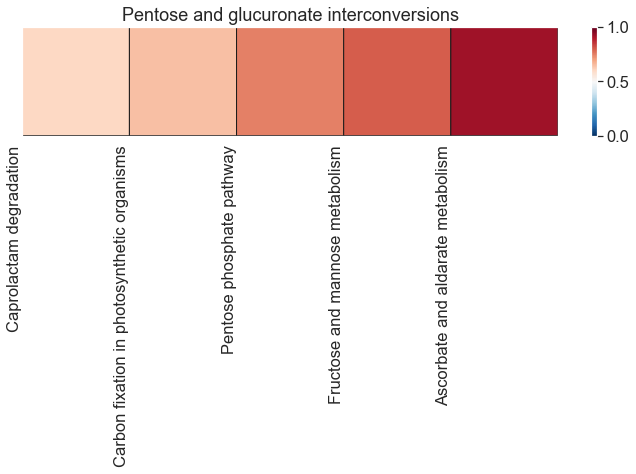

<Figure size 432x288 with 0 Axes>

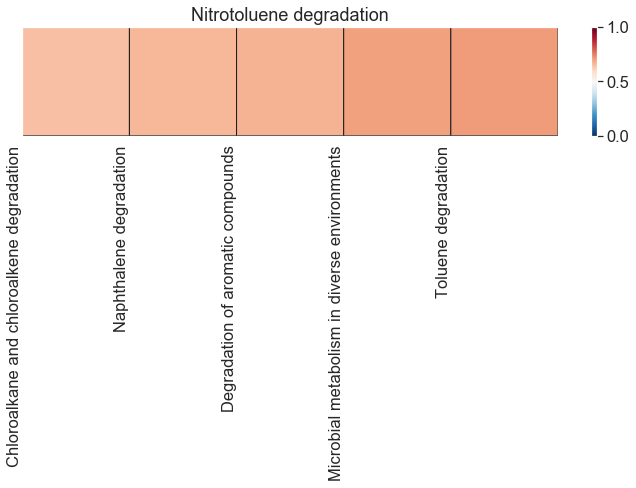

<Figure size 432x288 with 0 Axes>

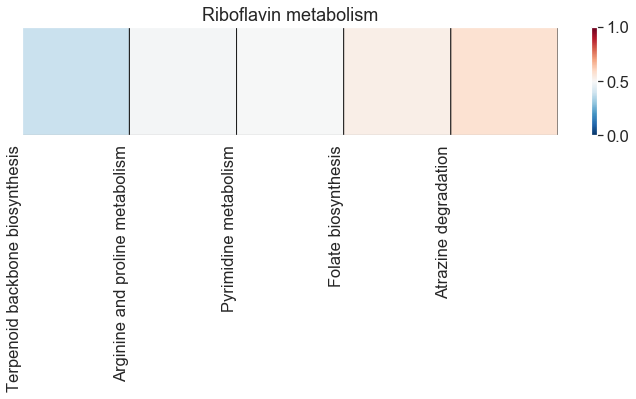

<Figure size 432x288 with 0 Axes>

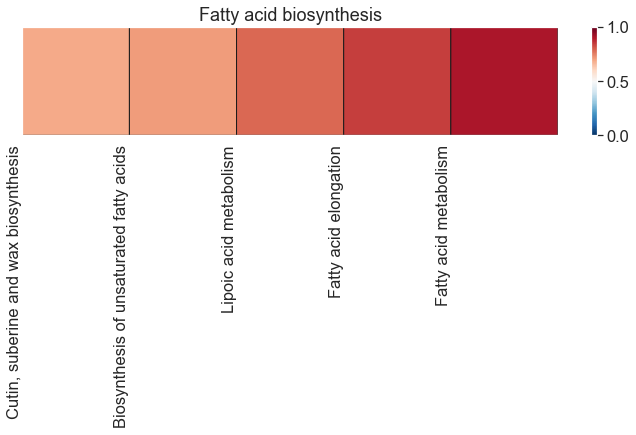

<Figure size 432x288 with 0 Axes>

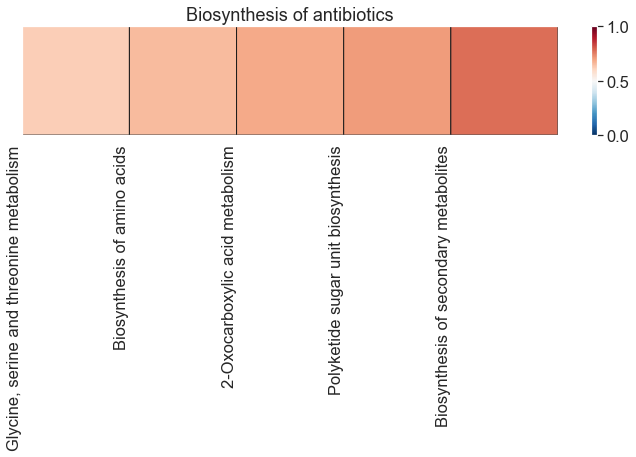

<Figure size 432x288 with 0 Axes>

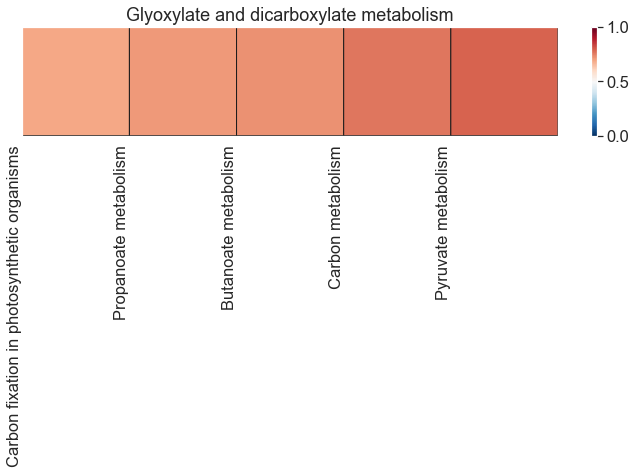

<Figure size 432x288 with 0 Axes>

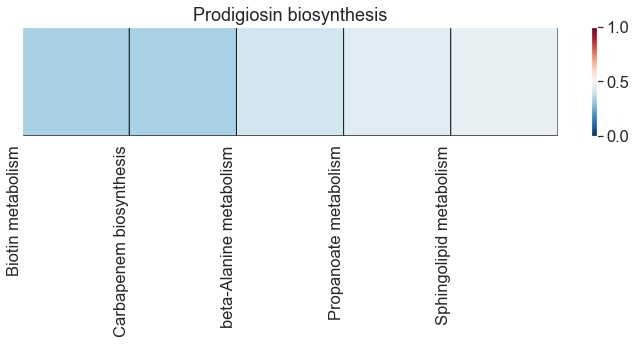

<Figure size 432x288 with 0 Axes>

In [15]:
Validation().print_heat_map_for_one_FT(df_sim,test_df)

In [16]:
valid=[['ec:4.2.1.166','ec:2.8.3.8','ec:3.1.2.1','ec:4.2.1.55','ec:1.1.1.157','ec:2.3.1.9']];
valid_dict={}
valid_dict['UNK']=valid[0]

df_sim=pd.DataFrame(columns=['Pathway_test','Pathway_train','Similarity','test length','train length'])
for i,j in enumerate(valid):
    for k,l in enumerate(train):
        sim=model_gensim.n_similarity(valid[i], train[k])
        if sim>0:
            lst=[[list(valid_dict.keys())[i],list(train_dict.keys())[k],sim,len(valid[i]),len(train[k])]]
            df_sim=df_sim.append(pd.DataFrame(lst,
                                              columns=['Pathway_test','Pathway_train','Similarity','test length','train length']))


/Users/saijananiganesan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  


In [17]:
df_sim.sort_values(by=['Similarity']).tail(10)

Pathway_test                            Pathway_train  Similarity  \
0          UNK  Biosynthesis of unsaturated fatty acids    0.447109   
0          UNK              Biosynthesis of amino acids    0.456171   
0          UNK                     Butanoate metabolism    0.471828   
0          UNK      C5-Branched dibasic acid metabolism    0.476890   
0          UNK     Cutin, suberine and wax biosynthesis    0.487051   
0          UNK                    Fatty acid metabolism    0.500219   
0          UNK                     Geraniol degradation    0.507851   
0          UNK          alpha-Linolenic acid metabolism    0.639966   
0          UNK                    Propanoate metabolism    0.680062   
0          UNK                    Fatty acid elongation    0.693221   

  test length train length  
0           6           15  
0           6          148  
0           6           60  
0           6           24  
0           6            9  
0           6           44  
0           6           10  
0           6           16  
0           6           61  
0           6           15

#### Conclusions: 
##### 1. FastText perfoms as well as LDA except in predicting secondary metabolites
##### 2. FastText can be used when test set contains words not seen by the model, unlike LDA
##### 3. In addition to similarity, LDA provides co-occuring clusters that can be used for pathway prediction

